In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Correct paths to the files in Google Colab
xlsx_data_path = '/content/datas.xlsx'
json_data_path = '/content/res1.json'

# Load the Excel data
xlsx_data = pd.read_excel(xlsx_data_path)

# Load the JSON data
json_data = pd.read_json(json_data_path)

# Convert the 'date' column in Excel data to datetime format
xlsx_data['date'] = pd.to_datetime(xlsx_data['date'])


FileNotFoundError: [Errno 2] No such file or directory: '/content/datas.xlsx'

In [ ]:
# Extract different time-based features from the 'date' column
xlsx_data['hour'] = xlsx_data['date'].dt.hour
xlsx_data['day_of_week'] = xlsx_data['date'].dt.day_name()
xlsx_data['month'] = xlsx_data['date'].dt.month_name()
xlsx_data['week_of_year'] = xlsx_data['date'].dt.isocalendar().week
xlsx_data['season'] = xlsx_data['date'].dt.month % 12 // 3 + 1  # Assign seasons: 1 - Winter, 2 - Spring, 3 - Summer, 4 - Fall
xlsx_data['season_label'] = xlsx_data['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


<ipython-input-20-bfd3a07edb6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=xlsx_data, palette='magma')


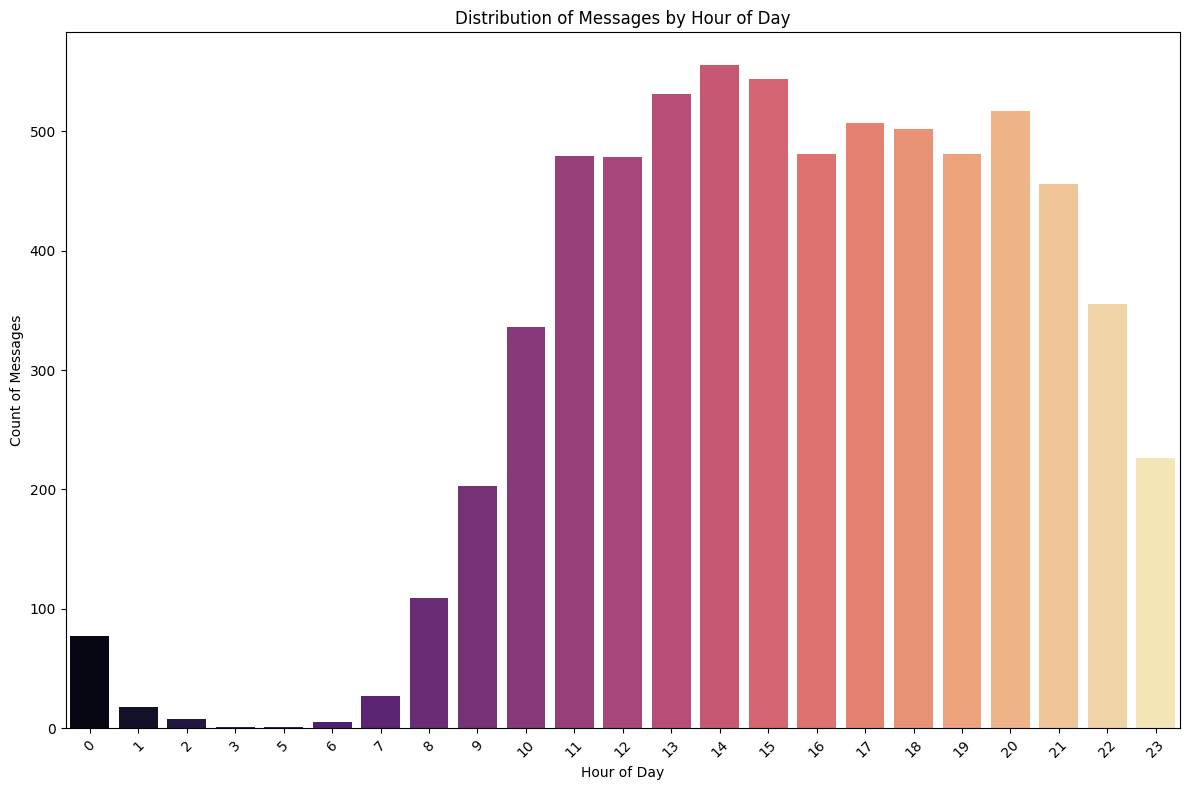

In [ ]:
# 1. Distribution of Messages by Hour of Day
plt.figure(figsize=(12,8))
sns.countplot(x='hour', data=xlsx_data, palette='magma')
plt.title('Distribution of Messages by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-21-6b86ab78f695>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=xlsx_data, palette='magma', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


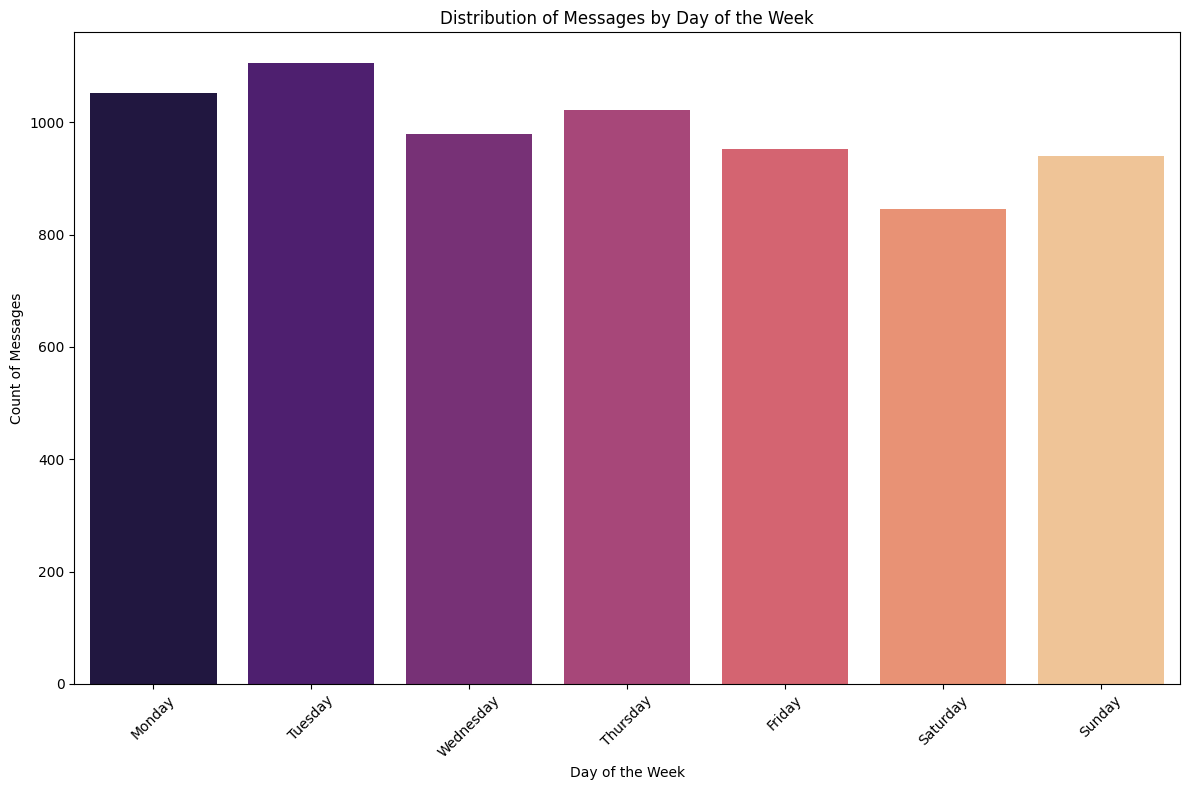

In [ ]:
# 2. Distribution of Messages by Day of the Week
plt.figure(figsize=(12,8))
sns.countplot(x='day_of_week', data=xlsx_data, palette='magma', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Messages by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-22-c0b98cd6bdc1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=xlsx_data, palette='magma')


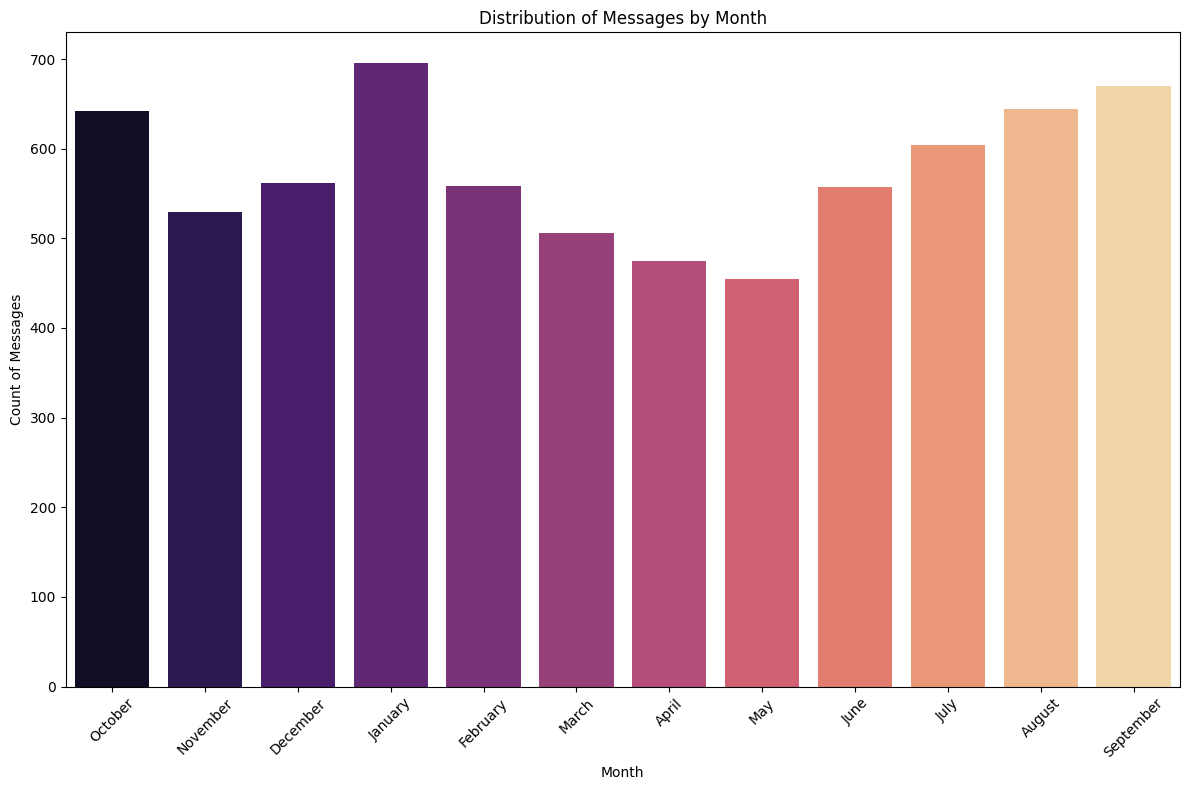

In [ ]:
# 3. Distribution of Messages by Month
plt.figure(figsize=(12,8))
sns.countplot(x='month', data=xlsx_data, palette='magma')
plt.title('Distribution of Messages by Month')
plt.xlabel('Month')
plt.ylabel('Count of Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-23-9dcda3dfdff3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season_label', data=xlsx_data, palette='magma')


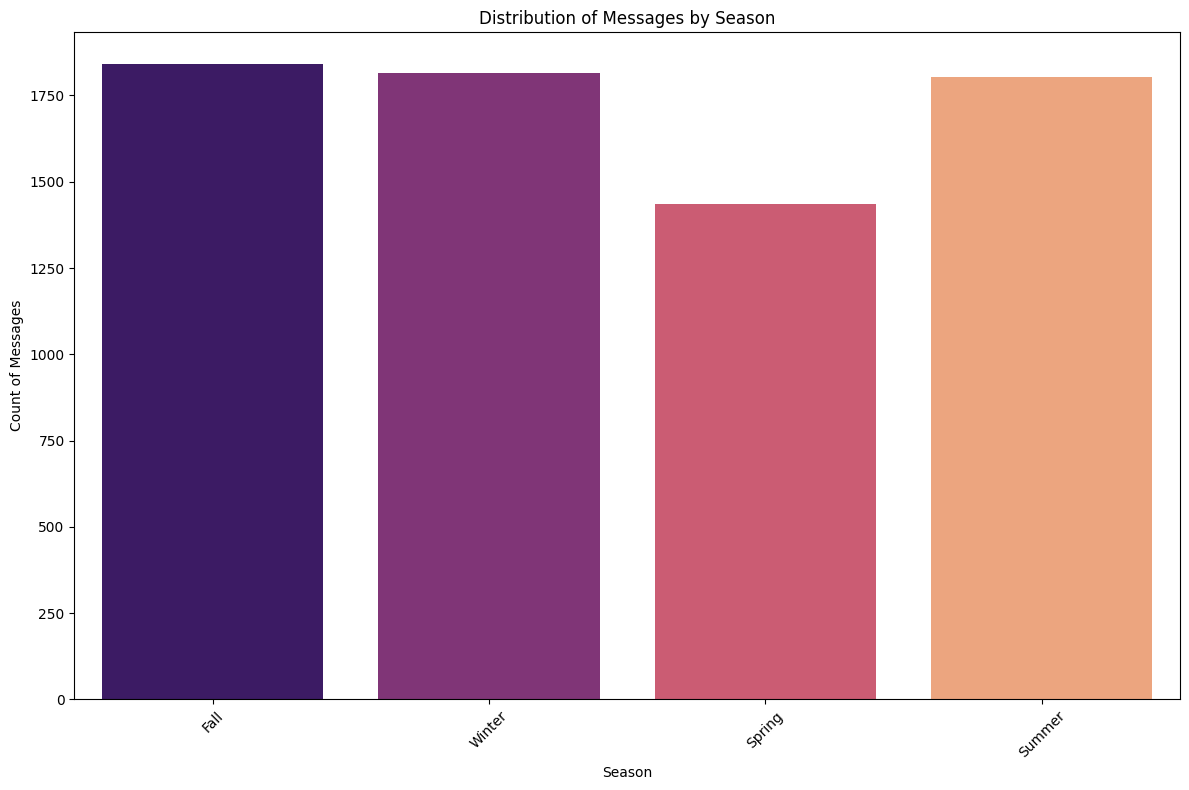

In [ ]:
# 4. Distribution by Season
plt.figure(figsize=(12,8))
sns.countplot(x='season_label', data=xlsx_data, palette='magma')
plt.title('Distribution of Messages by Season')
plt.xlabel('Season')
plt.ylabel('Count of Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-25-874b167c4003>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='week_of_year', data=xlsx_data, palette='magma')


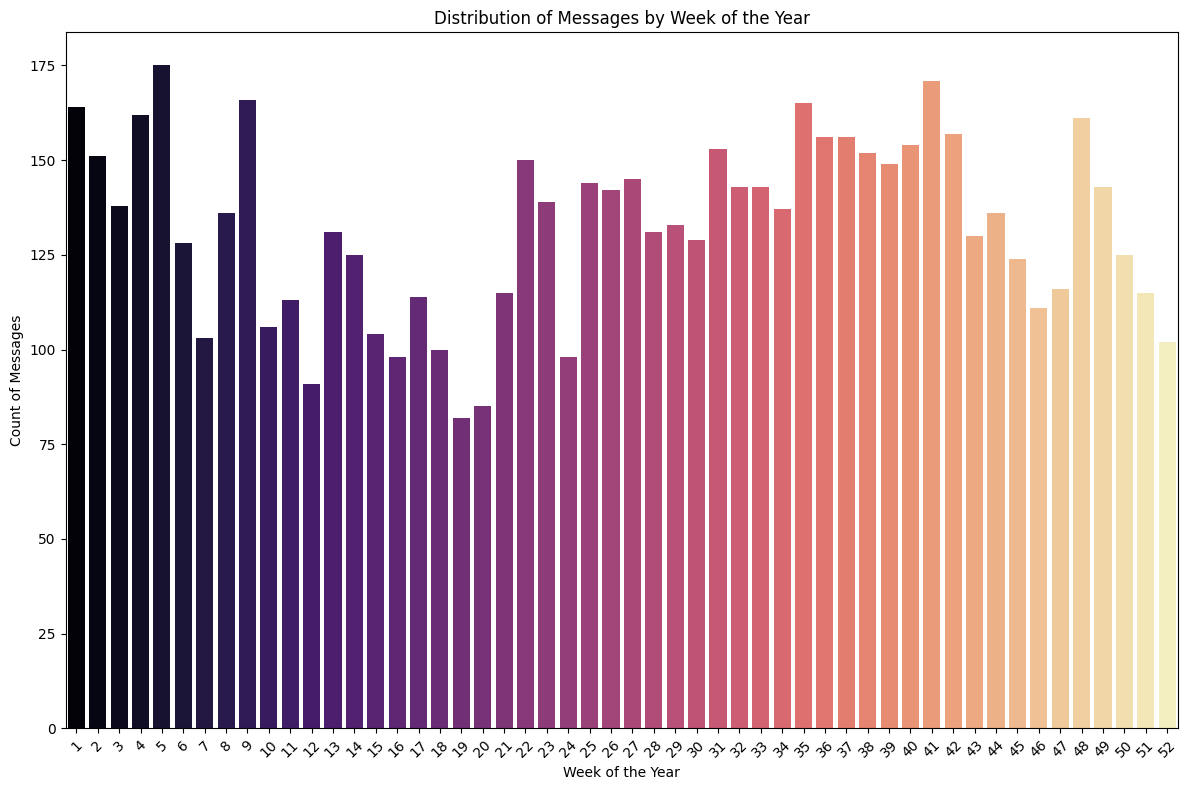

In [ ]:
# 5. Distribution by Week of the Year
plt.figure(figsize=(12,8))
sns.countplot(x='week_of_year', data=xlsx_data, palette='magma')
plt.title('Distribution of Messages by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Count of Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

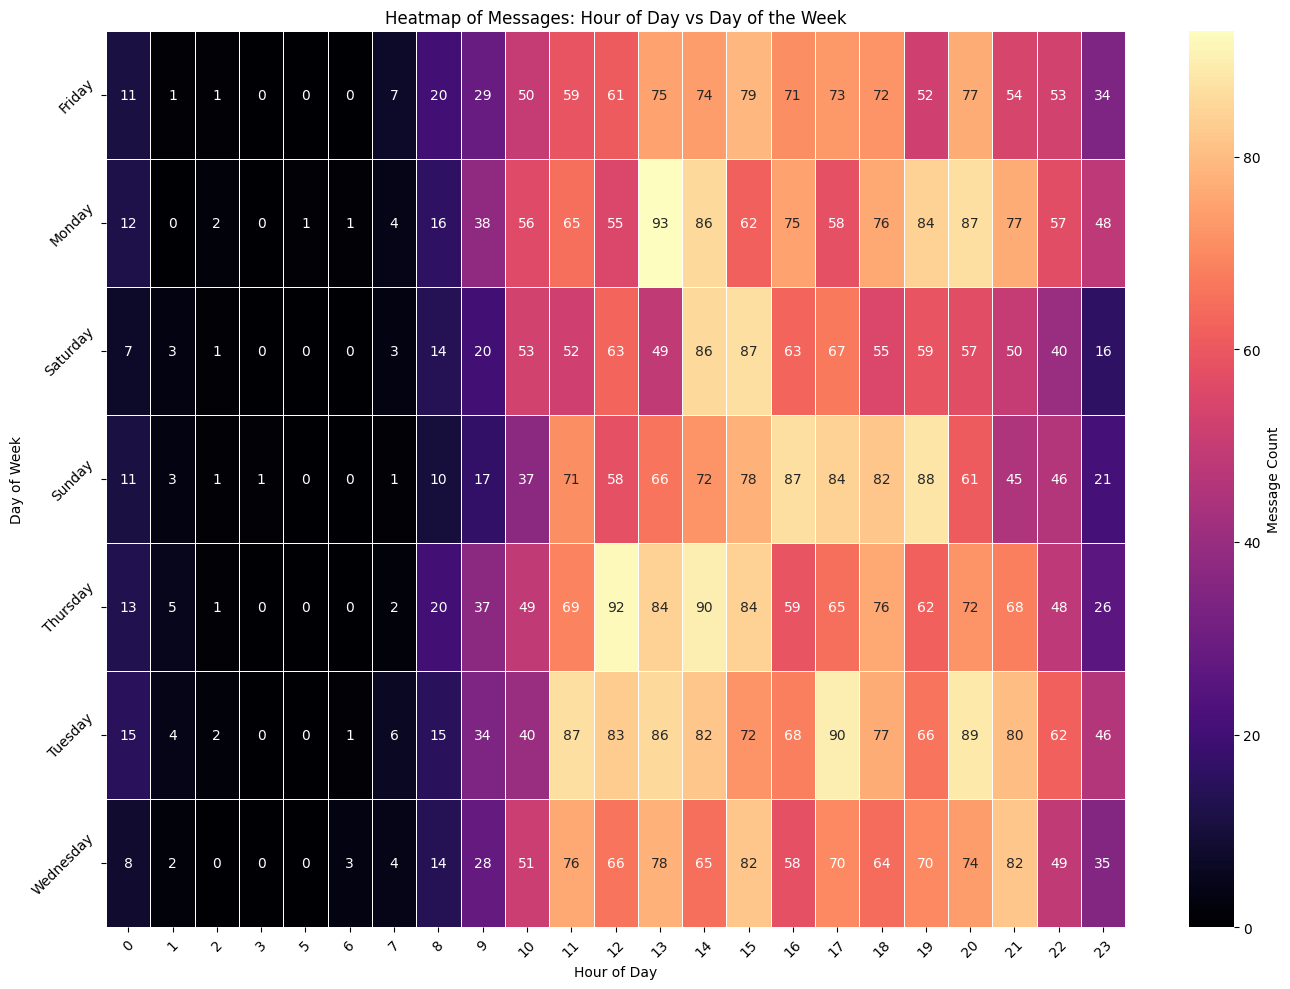

In [ ]:
# 6. Heatmap: Hour of Day vs Day of the Week
plt.figure(figsize=(14,10))
heatmap_data = xlsx_data.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Message Count'})
plt.title('Heatmap of Messages: Hour of Day vs Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-28-2e42ad3fc6f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=xlsx_data['date'].dt.day, data=xlsx_data, palette='coolwarm')


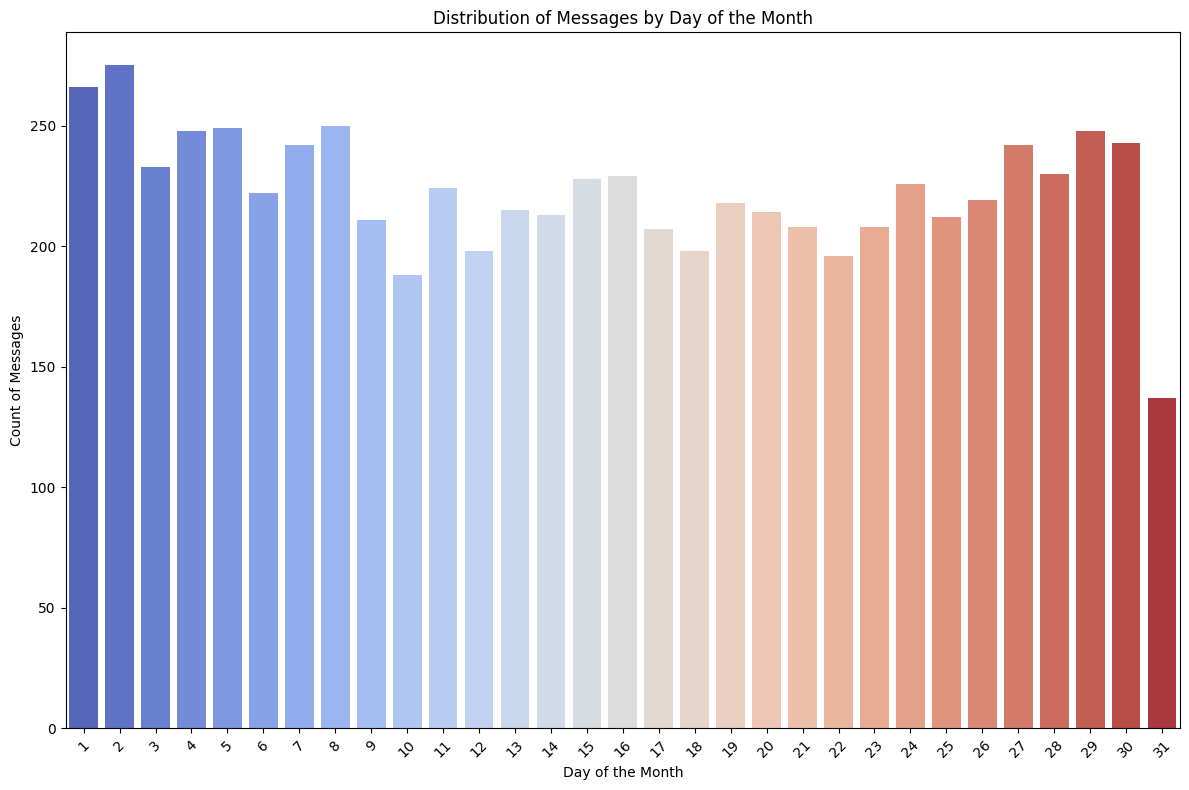

In [ ]:
# 1. График распределения сообщений по дням месяца
plt.figure(figsize=(12,8))
sns.countplot(x=xlsx_data['date'].dt.day, data=xlsx_data, palette='coolwarm')
plt.title('Distribution of Messages by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count of Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-29-ee7f1c4bd140>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='time_of_day', data=xlsx_data, palette='coolwarm')


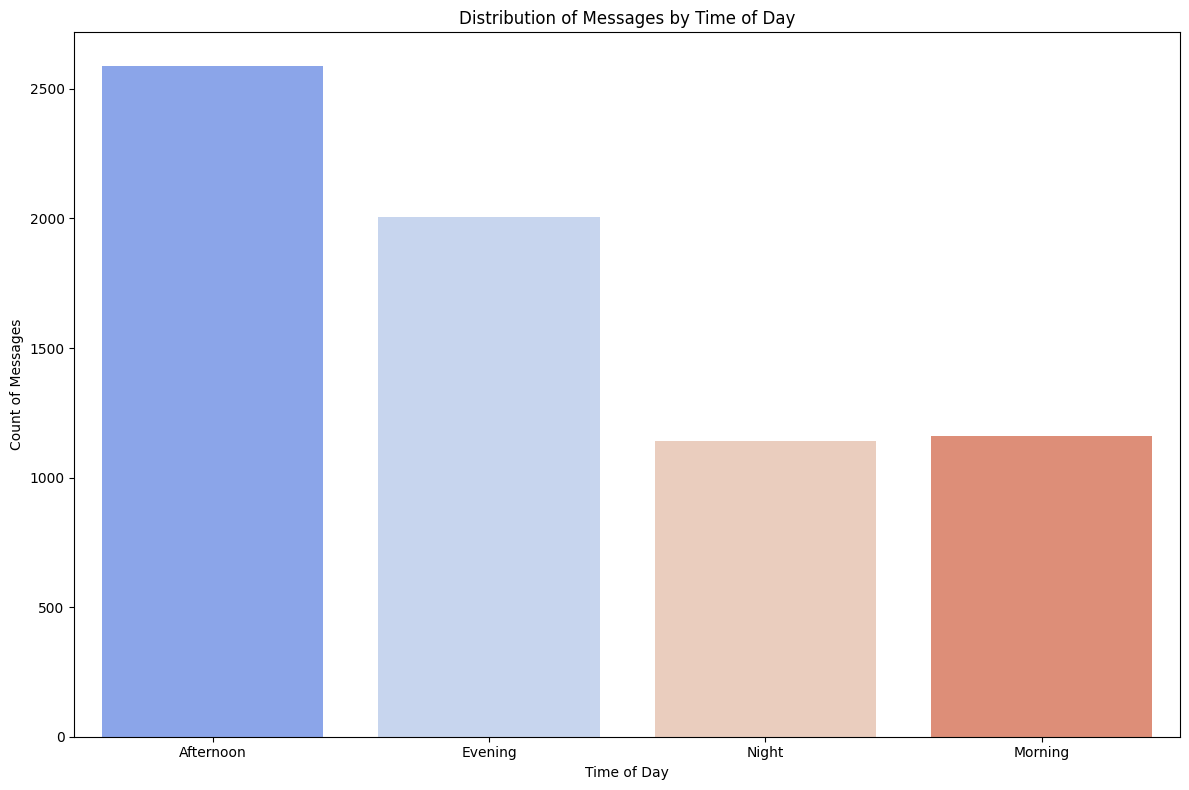

In [ ]:
# 2. График активности в зависимости от времени дня (утро, день, вечер)
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

xlsx_data['time_of_day'] = xlsx_data['hour'].apply(categorize_time)
plt.figure(figsize=(12,8))
sns.countplot(x='time_of_day', data=xlsx_data, palette='coolwarm')
plt.title('Distribution of Messages by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count of Messages')
plt.tight_layout()
plt.show()
